In [1]:
# https://github.com/fivethirtyeight/data/tree/master/college-majors

In [3]:
import pandas as pd
from pandas import Series, DataFrame

In [4]:
recent_grads_df = pd.read_csv('data/recent-grads.csv')
all_ages_df = pd.read_csv('data/all-ages.csv')
majors_list_df = pd.read_csv('data/majors-list.csv')

In [5]:
recent_grads_df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [7]:
recent_grads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [6]:
all_ages_df.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [7]:
majors_list_df.head()

,FOD1P,Major,Major_Category
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources
4,1104,FOOD SCIENCE,Agriculture & Natural Resources


In [8]:
majors_list_df[majors_list_df['Major'].str.contains('COMPUTER')]


,FOD1P,Major,Major_Category
50,2100,COMPUTER AND INFORMATION SYSTEMS,Computers & Mathematics
51,2101,COMPUTER PROGRAMMING AND DATA PROCESSING,Computers & Mathematics
52,2102,COMPUTER SCIENCE,Computers & Mathematics
54,2106,COMPUTER ADMINISTRATION MANAGEMENT AND SECURITY,Computers & Mathematics
55,2107,COMPUTER NETWORKING AND TELECOMMUNICATIONS,Computers & Mathematics
59,4005,MATHEMATICS AND COMPUTER SCIENCE,Computers & Mathematics
67,2308,SCIENCE AND COMPUTER TEACHER EDUCATION,Education
84,2407,COMPUTER ENGINEERING,Engineering


In [23]:
CompAndMathDF = majors_list_df.loc[majors_list_df['Major_Category'] == 'Computers & Mathematics']

In [151]:
# Codes of Computer And Math Majors
ComputerMajorCodes = CompAndMathDF['FOD1P'].tolist()
# appending 'Computer Engineering' code to list
ComputerMajorCodes.append('2407')
ComputerMajorCodes = [int(i) for i in ComputerMajorCodes]

In [152]:
# Mean of unemployment rates across all majors
mean_unemployment_all_majors = recent_grads_df['Unemployment_rate'].mean()
computer_majors_df = recent_grads_df[recent_grads_df['Major_code'].isin(ComputerMajorCodes)]
computer_majors_df = computer_majors_df[computer_majors_df.Major != 'MATHEMATICS']

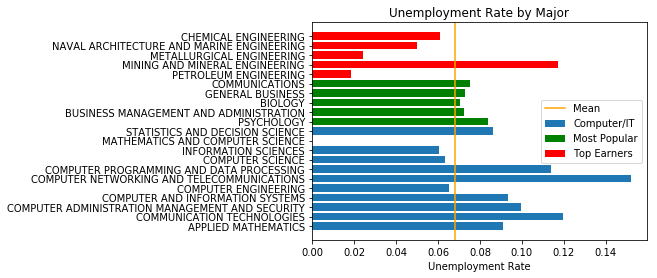

In [224]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

x = computer_majors_df['Major'].tolist()
y = computer_majors_df['Unemployment_rate'].tolist()

x_2 = recent_grads_df.sort_values('Total', ascending=False).head()['Major'].tolist()
y_2 = recent_grads_df.sort_values('Total', ascending=False).head()['Unemployment_rate'].tolist()

x_3 = recent_grads_df.sort_values('Median', ascending=False).head()['Major'].tolist()
y_3 = recent_grads_df.sort_values('Median', ascending=False).head()['Unemployment_rate'].tolist()

plt.barh(x,y, label='Computer/IT')
plt.barh(x_2, y_2, color='green', label='Most Popular')
plt.barh(x_3 ,y_3, color='red', label='Top Earners')

plt.axvline(mean_unemployment_all_majors, color='orange', label='Mean')
plt.xlabel('Unemployment Rate')
plt.title('Unemployment Rate by Major')
plt.legend()
plt.show()

In [160]:
recent_grads_df['Total_rank'] = recent_grads_df['Total'].rank(ascending=0)
recent_grads_df.sort_values('Total', ascending=0).head(10)[['Total_rank','Major','Total']]

,Total_rank,Major,Total
145,1.0,PSYCHOLOGY,393735.0
76,2.0,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0
123,3.0,BIOLOGY,280709.0
57,4.0,GENERAL BUSINESS,234590.0
93,5.0,COMMUNICATIONS,213996.0
34,6.0,NURSING,209394.0
77,7.0,MARKETING AND MARKETING RESEARCH,205211.0
40,8.0,ACCOUNTING,198633.0
137,9.0,ENGLISH LANGUAGE AND LITERATURE,194673.0
78,10.0,POLITICAL SCIENCE AND GOVERNMENT,182621.0


In [161]:
computer_majors_df.sort_values('Total', ascending=0)[['Total_rank','Major', 'Total']]

,Total_rank,Major,Total
20,17.0,COMPUTER SCIENCE,128319.0
10,42.0,COMPUTER ENGINEERING,41542.0
42,48.0,COMPUTER AND INFORMATION SYSTEMS,36698.0
105,78.0,COMMUNICATION TECHNOLOGIES,18035.0
45,100.0,INFORMATION SCIENCES,11913.0
81,118.0,COMPUTER ADMINISTRATION MANAGEMENT AND SECURITY,8066.0
84,119.0,COMPUTER NETWORKING AND TELECOMMUNICATIONS,7613.0
46,123.0,STATISTICS AND DECISION SCIENCE,6251.0
47,126.0,APPLIED MATHEMATICS,4939.0
53,132.0,COMPUTER PROGRAMMING AND DATA PROCESSING,4168.0


In [184]:
recent_grads_df.sort_values('Rank').head(20)[recent_grads_df.Sample_size > 30][['Rank','Major', 'Median']]

C:\Users\Elton\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Rank,Major,Median
0,1,PETROLEUM ENGINEERING,110000
60,61,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,40000
15,16,BIOLOGICAL ENGINEERING,57100
4,5,CHEMICAL ENGINEERING,65000
10,11,COMPUTER ENGINEERING,60000
6,7,ACTUARIAL SCIENCE,62000
9,10,ELECTRICAL ENGINEERING,60000
21,22,FOOD SCIENCE,53000
20,21,COMPUTER SCIENCE,53000
29,30,PUBLIC POLICY,50000


In [182]:
computer_majors_df.sort_values('Rank')[['Rank','Major', 'Median']]

,Rank,Major,Median
10,11,COMPUTER ENGINEERING,60000
20,21,COMPUTER SCIENCE,53000
42,43,COMPUTER AND INFORMATION SYSTEMS,45000
45,46,INFORMATION SCIENCES,45000
46,47,STATISTICS AND DECISION SCIENCE,45000
47,48,APPLIED MATHEMATICS,45000
52,53,MATHEMATICS AND COMPUTER SCIENCE,42000
53,54,COMPUTER PROGRAMMING AND DATA PROCESSING,41300
81,82,COMPUTER ADMINISTRATION MANAGEMENT AND SECURITY,37500
84,85,COMPUTER NETWORKING AND TELECOMMUNICATIONS,36400


In [186]:
recent_grads_df.sort_values('P75th', ascending=0).head(20)[recent_grads_df.Sample_size > 30][['Rank','Major', 'P75th']]

C:\Users\Elton\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Rank,Major,P75th
0,1,PETROLEUM ENGINEERING,125000
60,61,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,90000
15,16,BIOLOGICAL ENGINEERING,76000
4,5,CHEMICAL ENGINEERING,75000
10,11,COMPUTER ENGINEERING,75000
6,7,ACTUARIAL SCIENCE,72000
9,10,ELECTRICAL ENGINEERING,72000
21,22,FOOD SCIENCE,70000
20,21,COMPUTER SCIENCE,70000
29,30,PUBLIC POLICY,70000


In [214]:
recent_grads_df['Total_Jobs'] = recent_grads_df['College_jobs'] + recent_grads_df['Non_college_jobs'] + recent_grads_df['Low_wage_jobs']
recent_grads_df['Ratio_Low_Wage'] = recent_grads_df['Low_wage_jobs'] / recent_grads_df['Total_Jobs']

In [216]:
Ratio_Low_Wage_df = recent_grads_df.sort_values('Ratio_Low_Wage', ascending=1).head(20)
Ratio_Low_Wage_df[Ratio_Low_Wage_df.Ratio_Low_Wage != 0][['Major', 'Ratio_Low_Wage']]

,Major,Ratio_Low_Wage
13,MATERIALS SCIENCE,0.026146
161,MISCELLANEOUS AGRICULTURE,0.027193
23,MATERIALS ENGINEERING AND MATERIALS SCIENCE,0.030621
10,COMPUTER ENGINEERING,0.032242
34,NURSING,0.033661
11,AEROSPACE ENGINEERING,0.033877
91,SOCIAL PSYCHOLOGY,0.034774
169,EDUCATIONAL PSYCHOLOGY,0.037529
4,CHEMICAL ENGINEERING,0.040968
75,"ELECTRICAL, MECHANICAL, AND PRECISION TECHNOLO...",0.041305


In [219]:
recent_grads_df['Ratio_Non_college'] = recent_grads_df['Non_college_jobs'] / recent_grads_df['Total_Jobs']
ratio_non_college_df = recent_grads_df.sort_values('Ratio_Non_college', ascending=1).head(20)
ratio_non_college_df[ratio_non_college_df.Ratio_Non_college != 0][['Major', 'Ratio_Non_college']]

,Major,Ratio_Non_college
33,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,0.083333
52,MATHEMATICS AND COMPUTER SCIENCE,0.123162
13,MATERIALS SCIENCE,0.126210
23,MATERIALS ENGINEERING AND MATERIALS SCIENCE,0.133421
6,ACTUARIAL SCIENCE,0.134131
34,NURSING,0.142112
154,TEACHER EDUCATION: MULTIPLE LEVELS,0.145047
119,MATHEMATICS TEACHER EDUCATION,0.146858
100,SPECIAL NEEDS EDUCATION,0.150908
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,0.161648


In [77]:
majors_list_df.loc[majors_list_df['Major_Category'] == 'Engineering']

,FOD1P,Major,Major_Category
76,1401,ARCHITECTURE,Engineering
77,2400,GENERAL ENGINEERING,Engineering
78,2401,AEROSPACE ENGINEERING,Engineering
79,2402,BIOLOGICAL ENGINEERING,Engineering
80,2403,ARCHITECTURAL ENGINEERING,Engineering
81,2404,BIOMEDICAL ENGINEERING,Engineering
82,2405,CHEMICAL ENGINEERING,Engineering
83,2406,CIVIL ENGINEERING,Engineering
84,2407,COMPUTER ENGINEERING,Engineering
85,2408,ELECTRICAL ENGINEERING,Engineering


In [209]:
recent_grads_df.loc[recent_grads_df['Major_category'] == 'Computers & Mathematics']

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Total_rank,Total_Jobs,Ratio_Non_College,Ratio_Low_Wage,Ratio_Non_college
20,21,2102,COMPUTER SCIENCE,128319.0,99743.0,28576.0,Computers & Mathematics,0.222695,1196,102087,...,39000,70000,68622,25667,5144,17.0,99433,0.051733,0.051733,0.258134
41,42,3700,MATHEMATICS,72397.0,39956.0,32441.0,Computers & Mathematics,0.448099,541,58118,...,33000,60000,34800,14829,4569,25.0,54198,0.084302,0.084302,0.273608
42,43,2100,COMPUTER AND INFORMATION SYSTEMS,36698.0,27392.0,9306.0,Computers & Mathematics,0.253583,425,28459,...,30000,60000,13344,11783,1672,48.0,26799,0.062390,0.062390,0.439681
45,46,2105,INFORMATION SCIENCES,11913.0,9005.0,2908.0,Computers & Mathematics,0.244103,158,9881,...,32500,58000,4390,4102,608,100.0,9100,0.066813,0.066813,0.450769
46,47,3702,STATISTICS AND DECISION SCIENCE,6251.0,2960.0,3291.0,Computers & Mathematics,0.526476,37,4247,...,26700,60000,2298,1200,343,123.0,3841,0.089300,0.089300,0.312419
47,48,3701,APPLIED MATHEMATICS,4939.0,2794.0,2145.0,Computers & Mathematics,0.434298,45,3854,...,34000,63000,2437,803,357,126.0,3597,0.099249,0.099249,0.223242
52,53,4005,MATHEMATICS AND COMPUTER SCIENCE,609.0,500.0,109.0,Computers & Mathematics,0.178982,7,559,...,30000,78000,452,67,25,171.0,544,0.045956,0.045956,0.123162
53,54,2101,COMPUTER PROGRAMMING AND DATA PROCESSING,4168.0,3046.0,1122.0,Computers & Mathematics,0.269194,43,3257,...,20000,46000,2024,1033,263,132.0,3320,0.079217,0.079217,0.311145
81,82,2106,COMPUTER ADMINISTRATION MANAGEMENT AND SECURITY,8066.0,6607.0,1459.0,Computers & Mathematics,0.180883,103,6509,...,25000,50000,2354,3244,308,118.0,5906,0.052150,0.052150,0.549272
84,85,2107,COMPUTER NETWORKING AND TELECOMMUNICATIONS,7613.0,5291.0,2322.0,Computers & Mathematics,0.305005,97,6144,...,27000,49000,2593,2941,352,119.0,5886,0.059803,0.059803,0.499660


In [33]:
recent_grads_df.loc[recent_grads_df['Major'] == 'COMPUTER SCIENCE']

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
20,21,2102,COMPUTER SCIENCE,128319.0,99743.0,28576.0,Computers & Mathematics,0.222695,1196,102087,...,18726,70932,6884,0.063173,53000,39000,70000,68622,25667,5144


In [37]:
recent_grads_df.sort_values('Median')

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
167,168,3302,COMPOSITION AND RHETORIC,18953.0,7022.0,11931.0,Humanities & Liberal Arts,0.629505,151,15053,...,6612,7832,1340,0.081742,27000,20000,35000,4855,8100,3466
166,167,6001,DRAMA AND THEATER ARTS,43249.0,14440.0,28809.0,Arts,0.666119,357,36165,...,15994,16891,3040,0.077541,27000,19200,35000,6994,25313,11068
165,166,2603,OTHER FOREIGN LANGUAGES,11204.0,3472.0,7732.0,Humanities & Liberal Arts,0.690111,56,7052,...,3685,3214,846,0.107116,27500,22900,38000,2326,3703,1115
164,165,2307,EARLY CHILDHOOD EDUCATION,37589.0,1167.0,36422.0,Education,0.968954,342,32551,...,7001,20748,1360,0.040105,28000,21000,35000,23515,7705,2868
163,164,6102,COMMUNICATION DISORDERS SCIENCES AND SERVICES,38279.0,1225.0,37054.0,Health,0.967998,95,29763,...,13862,14460,1487,0.047584,28000,20000,40000,19957,9404,5125


In [45]:
len(majors_list_df['Major_Category'].unique())

17

In [47]:
df = pd.read_excel('LPR_data-2018-02.xlsx')

In [58]:
df.loc[df['Dimension'] == 'Computer Software & Hardware']

,Metro,Dimension Type,Month,Dimension,Measure,Value,YoY
1060,National,Industry,2018-02,Computer Software & Hardware,Median Base Pay,53154.0,NaN
1097,New York City,Industry,2018-02,Computer Software & Hardware,Median Base Pay,62966.0,NaN
1134,Los Angeles,Industry,2018-02,Computer Software & Hardware,Median Base Pay,61627.0,NaN
1171,Chicago,Industry,2018-02,Computer Software & Hardware,Median Base Pay,57339.0,NaN
1208,Houston,Industry,2018-02,Computer Software & Hardware,Median Base Pay,57190.0,NaN
1245,Washington DC,Industry,2018-02,Computer Software & Hardware,Median Base Pay,60893.0,NaN
1282,Philadelphia,Industry,2018-02,Computer Software & Hardware,Median Base Pay,57346.0,NaN
1319,Atlanta,Industry,2018-02,Computer Software & Hardware,Median Base Pay,54838.0,NaN
1356,Boston,Industry,2018-02,Computer Software & Hardware,Median Base Pay,60118.0,NaN
1393,San Francisco,Industry,2018-02,Computer Software & Hardware,Median Base Pay,70176.0,NaN


In [60]:
df['Measure'].unique()

array([u'U.S. Median Pay', u'Metro Median Pay', u'Job Openings',
       u'Labor Force Size', u'Total Employment', u'Unemployment Rate',
       u'Median Base Pay'], dtype=object)

In [63]:
df.loc[df['Dimension'] == 'Job Openings']

,Metro,Dimension Type,Month,Dimension,Measure,Value,YoY
3,Atlanta,Quick Facts,2018-02,Job Openings,Job Openings,111588.0,0.141
9,New York City,Quick Facts,2018-02,Job Openings,Job Openings,300950.0,0.166
15,Los Angeles,Quick Facts,2018-02,Job Openings,Job Openings,212700.0,0.233
21,Philadelphia,Quick Facts,2018-02,Job Openings,Job Openings,110289.0,0.096
27,Houston,Quick Facts,2018-02,Job Openings,Job Openings,93800.0,0.185
33,Seattle,Quick Facts,2018-02,Job Openings,Job Openings,104720.0,0.014
39,San Francisco,Quick Facts,2018-02,Job Openings,Job Openings,146218.0,0.274
45,Chicago,Quick Facts,2018-02,Job Openings,Job Openings,194029.0,0.224
51,Boston,Quick Facts,2018-02,Job Openings,Job Openings,157492.0,0.281
57,Washington DC,Quick Facts,2018-02,Job Openings,Job Openings,170145.0,0.098


In [62]:
df['Dimension Type'].unique()

array([u'Quick Facts', u'Job Title', u'Company Size', u'Industry',
       u'Timeseries'], dtype=object)

In [65]:
df.loc[df['Dimension Type'] == 'Industry']

,Metro,Dimension Type,Month,Dimension,Measure,Value,YoY
1051,National,Industry,2018-02,Accounting & Legal,Median Base Pay,52575.0,NaN
1052,National,Industry,2018-02,Aerospace & Defense,Median Base Pay,54762.0,NaN
1053,National,Industry,2018-02,Architecture & Civil Engineering,Median Base Pay,52469.0,NaN
1054,National,Industry,2018-02,Arts & Entertainment,Median Base Pay,45952.0,NaN
1055,National,Industry,2018-02,Automotive,Median Base Pay,47632.0,NaN
1056,National,Industry,2018-02,Banking & Financial Services,Median Base Pay,51346.0,NaN
1057,National,Industry,2018-02,Beauty & Fitness,Median Base Pay,47459.0,NaN
1058,National,Industry,2018-02,Biotech & Pharmaceuticals,Median Base Pay,54533.0,NaN
1059,National,Industry,2018-02,Business Services,Median Base Pay,49169.0,NaN
1060,National,Industry,2018-02,Computer Software & Hardware,Median Base Pay,53154.0,NaN


In [66]:
df2 = df.loc[df['Dimension'] == 'Computer Software & Hardware']

In [71]:
df.loc[df['Measure'] == 'Metro Median Pay']

,Metro,Dimension Type,Month,Dimension,Measure,Value,YoY
1,Atlanta,Quick Facts,2018-02,Metro Median Pay,Metro Median Pay,53870.0,0.017
7,New York City,Quick Facts,2018-02,Metro Median Pay,Metro Median Pay,61857.0,0.018
13,Los Angeles,Quick Facts,2018-02,Metro Median Pay,Metro Median Pay,60420.0,0.009
19,Philadelphia,Quick Facts,2018-02,Metro Median Pay,Metro Median Pay,55512.0,0.012
25,Houston,Quick Facts,2018-02,Metro Median Pay,Metro Median Pay,55621.0,0.013
31,Seattle,Quick Facts,2018-02,Metro Median Pay,Metro Median Pay,61576.0,0.010
37,San Francisco,Quick Facts,2018-02,Metro Median Pay,Metro Median Pay,69276.0,0.031
43,Chicago,Quick Facts,2018-02,Metro Median Pay,Metro Median Pay,56304.0,0.000
49,Boston,Quick Facts,2018-02,Metro Median Pay,Metro Median Pay,59363.0,0.011
55,Washington DC,Quick Facts,2018-02,Metro Median Pay,Metro Median Pay,59780.0,0.019


In [ ]:
recent_grads_df